In [24]:
import pylab
import numpy as np
import random as rnd
import networkx as nx
import scipy.stats as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show_3dplot(X, Y, Z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z)
    plt.show()

<center> <h2>Wrocław University of Science and Technology</h2> <br> <br> 
        <h3>Partial Differential Equations</h3> <br><br><br>
        <h1>Computer Project: <br> Finite Difference Method <br> for solving Elliptic Equations</h1> <br>
        <i>Aleksandra Badowska 229953<br>
        Marta Kawałko 229955 <br>
        Krzysztof Wnuk 229960</i></center>
        
<br><br><br><br><br><br>

        
<font color="white" size=0.1>$\label{Introduction}\tag{1}$</font>      
#  1 Introduction 
Having the basic knowledge of partial differential equations is essential to understand the surrounding world. PDEs contain multivariable functions and their partial derivatives. They describe various problems and can be split into few classes. Note that some of the equations do not belong to any of the classes mentioned below. The linear second-order differential equation in two independent variables has the following form:

$$au_{xx}+bu_{xy}+cu_{yy}+du_{x}+eu_{y}+fu=g.$$

Let's classify the partial differential equations by the sign of the discriminant $b^2-4ac:$

$$\text{The PDE is}
\begin{cases}
\text{elliptic} \quad &\text{if} \quad b^2-4ac < 0,\\
\text{parabolic} \quad &\text{if} \quad b^2-4ac = 0,\\
\text{hyperbolic} \quad &\text{if} \quad b^2-4ac > 0.
\end{cases}$$

In out project we will focus on elliptic equations described in \ref{Elliptic}.

<font color="white" size=0.1>$\label{Elliptic}\tag{2}$</font>
# 2 Elliptic equations 
Elliptic equations are related to steady-state behaviour and equilibrium phenomena. They are non-trivial only in dimensions larger than $1$.
According to our previus accumption the equation is elliptic if $b^2-4ac < 0$ and it is connected with the matrix in two space dimension:

\begin{align}
    A=\begin{bmatrix}
            a \quad b/2\\
            b/2 \quad c
      \end{bmatrix}
\end{align}

For $\nabla^2u$ the above matrix is $N \times N$ identity matrix and so this is an elliptic operator. 

Based on \ref{plocin} heat in domain D evolves according to 

$$ u_t = \Delta u + f .$$ 

When the enough time passes, we should obtain steady-state $(u_t \to 0)$. And then we get $ - \Delta u = f,$ which is elliptic equation, called Poisson's equation. 

$$\nabla^2 u = f, \quad \frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = f \quad \text{in 2-D}, $$ 

where $\nabla^2$ is the Laplacian operator and $f$ is a given function $f(x,y)$.

For $ f \equiv 0$ we get $\Delta u = 0,$ which is Laplace's equation. The solutions of this equation are called harmonic functions.
The quintessential elliptic equation is Laplace's equation. It can be presented as follows:

$$\nabla^2 u = 0, \quad \frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = 0 \quad \text{in 2-D}.$$

We will be using such notation:

$$\nabla^2 u = 0, \quad u_{xx} + u_{yy} = 0 \quad \text{in 2-D}. $$

<font color="white" size=0.1>$\label{Finite}\tag{3}$</font>
# 3 Finite difference method 
## 3.1 General principle 

The finite difference approximations for derivatives are one of the simplest and the most convenient to apply methods to solve differential equations. 
The principle of finite difference methods is close to the numerical schemes used for solving ordinary differential equations and partial differential equations. It consists in approximating the differential operator by replacing the derivatives in the equation using differential quotients. The domain is subdivided in space and in time and approximations of the solution are computed at the space or time points. The difference between the numerical solution and the exact solution is determined by the discretization error or truncation error. The term truncation error reflects the fact that a finite part of a Taylor series is used in the approximation.

## 3.2 Approximation of first and second derivative 

First, assuming the function whose derivatives are to be approximated is properly-behaved, by Taylor's theorem, we can create a Taylor series expansion

$$f(x_0 + h) = f(x_0) + \frac{f'(x_0)}{1!}h + \frac{f^{(2)}(x_0)}{2!}h^2 + \cdots + \frac{f^{(n)}(x_0)}{n!}h^n + R_n(x),$$

where $n!$ denotes the factorial of $n$, and $R_n(x)$ is a remainder term, denoting the difference between the Taylor polynomial of degree $n$ and the original function. We will derive an approximation for the first derivative of the function $f$ by truncating the Taylor polynomial:

$$f(x_0 + h) = f(x_0) + f'(x_0)h + R_1(x),$$

Setting $x_0=a$ and dividing across by $h$ we obtain:

$${f(a+h)\over h} = {f(a)\over h} + f'(a)+{R_1(x)\over h} $$

Solving for $f'(a)$:

$$f'(a) = {f(a+h)-f(a)\over h} - {R_1(x)\over h}$$

Assuming that $R_1(x)$ is sufficiently small, the approximation of the first derivative of $f$ is:

$$f'(a)\approx {f(a+h)-f(a)\over h}.$$

Approximations to the second derivative $f''(a)$ can be obtained in an analogous manner. The standard second order centred approximation is given by 

$$f''(a)\approx {f(a-h)-2f(a)+f(a-h)\over h^2}.$$

<font color="white" size=0.1>$\label{Laplace}\tag{4}$</font>
# 4 Laplace's equation 
## 4.1 Solving Laplace's Equation using finite differences 

Follow the steps presented in the paper \ref{peirce} by Nathony Peirce.
Consider the following boundary condition:

\begin{align}
    \label{LP}
    u_{xx} + u_{yy} = 0,  & \quad 0 < x,y<1 \\
    \text{BC:} \quad u(0,y) =0;  \quad u(1,y) =0; & \quad u(x,0)=f(x); \quad u(x,1) =0. 
\end{align}

**_tutaj wstawić obrazek_**

Recall that the derivative of a function was defined by taking the limit of a difference quotient:

$$f'(x)=\lim_{h \to 0}\frac{f(x+h)-f(x)}{h}.$$

As we want to solve differential equations numerically we replace derivatives
by proper difference quotients. According to section \ref{Finite}, we use second order centred approximation in (\ref{LP}) and obtain the following result:

\begin{align}
    \Delta u(x,y) &= u_{xx} + u_{yy} \\ \nonumber
    \\
    \Delta u(x,y) &\approx \frac{u(x+h_x,y) - 2 u(x,y) +u(x-h_x,y)}{h_x^2} 
    + \frac{u(x,y+h_y) - 2 u(x,y) +u(x,y-h_y)}{h_y^2}. \nonumber
\end{align}

We partition the interval $0 \leqslant x \leqslant 1$ into $(N + 1)$ equally spaced nodes $x_n = n h_x$ and the interval $0 \leqslant y \leqslant 1$ into
$(M + 1)$ equally spaced nodes $y_m = mh_y.$ Replacing the derivatives in (\ref{LP})
and representing the mesh values at $(x_n, y_m)$ by $u_{nm} \approx u(x_n, y_m)$ we obtain:

\begin{align}
    \frac{u_{n+1m}-2u_{nm}+u_{n-1m}}{h_x^2} + \frac{u_{nm+1}-2u_{nm}+u_{nm-1}}{h_y^2} 
    = (u_{xx}+u_{yy})_{x_n,y_m} + R(h_x^2,h_y^2).
\end{align}

Assuming that $ h_x = h_y$ then we get

\begin{align}
    \label{DLP}
    u_{n+1m} + u_{n-1m} + u_{nm+1} + u_{nm-1} - 4u_{nm} = 0, \qquad 1 \leqslant n,~ m \leqslant (N - 1), ~ (M - 1) 
\end{align}

From that we have:

\begin{align}
    \label{DLP2}
    u_{nm} = \frac{u_{n+1m} + u_{n-1m} + u_{nm+1} + u_{nm-1}}{4}, \qquad 1 \leqslant n,~ m \leqslant (N - 1), ~ (M - 1) 
\end{align}

It clearly resembles arythmetic mean. We also can see that the discrete equation (\ref{DLP}) holds at every grid point $(x_n,x_m)$ that is not boundary. This gives us $(N -1) (M-1) $ equations. The discrete boundary conditions are:

\begin{align}
    u_{0,m} =0; \quad u(M,m) =0; \quad u(n,0) = f(x_n); \quad u(n,N) =0.
\end{align}

Each discrete equation in (\ref{DLP}) involves $5$ grid points, which forms computational stencil. 

\begin{align}
    \begin{bmatrix}
        \quad 1 \quad\\
        1\quad -4 \quad 1 \\
        \quad 1 \quad 
    \end{bmatrix}
\end{align}

This leads us to a $(N-1)^2 (M-1)^2$ system of linear equations.

## 4.2 Solving Laplace's Equation analytically 
Firstly, we are going to solve the Laplace's Equation analytically with the following conditions on a square:

$$\begin{cases}
    u_{xx}+u_{yy} =0\\
    u(x,0)=f(x)\\
    u(x,1) =0\\
    u(0,y)=0\\
    u(1,y)=0
\end{cases}
\Rightarrow~~
\begin{cases}
    X(x) Y(1)=0\\
    X(0) Y(y)=0\\
    X(1) Y(y) = 0
\end{cases}
\Rightarrow~
\begin{cases}
    Y(1)=0\\
    X(0) =0\\
    X(1)  = 0
\end{cases}$$

The equation is homogeneous which allows us to use separation of variables.

$$ U(X,Y) = X(x) Y(y), \quad X''Y + Y''X =0,  \quad \frac{X''}{X} = - \frac{Y''}{Y} = -\lambda$$

Now using the method for solving second order linear differential using characteristic equation:

$$ X(x) =A \cos(\sqrt{\lambda}x) + B \sin(\sqrt{\lambda}x), $$ 

Applying the values from initial conditions into the above equation we get:

$$\quad X(0) = 0 ~~\Rightarrow~~ X(0) = A\cdot 1 + 0 ~~\Rightarrow~~ X(x) = B \sin(\sqrt{\lambda}x),$$

$$\quad X(1) = 0 ~~\Rightarrow~~ B \sin(\sqrt{\lambda}) = 0 ~~\Rightarrow~~ \sqrt{\lambda} = k\pi, ~~ \text{where} ~ k \in \mathbb{N}_{+}, $$

Finally we obtain:

$$X(x)= B \sin(k \pi x),~~ \text{where} ~ k \in \mathbb{N}_{+}.$$

Now solving the equation for Y variable using general solution given by:

$$Y(y) =C e^{k \pi y} + D e^{-k\pi y}, ~~ \text{where} ~ k \in \mathbb{N}_{+}$$

$$ D e^{-k \pi} = - C e^{k \pi}, ~~ \text{where} ~ k \in \mathbb{N}_{+}$$ 

$$ D = - C e^{2k \pi}, ~~ \text{where} ~ k \in \mathbb{N}_{+}$$

$$ Y(y) = Ce^{k \pi y} - Ce^{2k \pi}e^{-k \pi y},~~ \text{where} ~ k \in \mathbb{N}_{+}$$ 

$$ Y(y) = C( e^{k \pi y} - e^{2 k \pi} e^{-k \pi y}),~~ \text{where} ~ k \in \mathbb{N}_{+}$$ 

$$Y(y)= C e^{k \pi} (e^{-k \pi+k \pi y}-e^{k\pi-k\pi y}),~~ \text{where} ~ k \in \mathbb{N}_{+} $$ 

$$Y(y)= Ce^{k \pi}( e^{k \pi(y-1)} - e^{-k \pi(y-1)}),~~ \text{where} ~ k \in \mathbb{N}_{+},$$

We solve for constants using initial conditions:

$$\quad Y(1) = 0 ~~\Rightarrow~~ Ce^{k \pi}( e^{k \pi(1-1)} - e^{-k \pi(1-1)}) = 0 \quad \checkmark $$

$$Y(y) = 2Ce^{k\pi} \sinh(k \pi (y-1)), ~~ \text{where} ~ k \in \mathbb{N}_{+}. $$

Remark that:

$$\sinh(k \pi) = \frac{e^{k\pi} - e^{- k \pi}}{2},$$ 

The final form is given by:

$$U(X,Y) = \sum_{k=1}^{\infty} A_k \sin(k\pi x)\sinh(k \pi (y-1)).$$

Setting $t=0$ from the initial condition we solve for $f(x)$

$$f(x) = u(x,0) = \sum_{k=1}^{\infty} A_k \sin(k\pi x)\sinh(-k \pi),  ~~ \text{where} ~ k \in \mathbb{N}_{+},$$

where 

$$ A_k \sinh(-k \pi) = 2  \int_{0}^{1} f(x) \sin(k \pi x) \mathrm{d}x~~ \Rightarrow ~~ A_k = \frac{2  \int_{0}^{1} f(x) \sin(k \pi x) \mathrm{d}x}{\sinh(-k \pi)}.$$

Let $f(x) = 1$. We calculate the $A_k$ and obtain the following:

$$U(X,Y) = 2 \sum_{k=1}^{\infty} \frac{1-\cos(k\pi)}{k\pi\sinh(-k\pi)} \sin(k\pi x)\sinh(k \pi (y-1)).$$

We implemented the equation above as follows:

In [25]:
def fun_analytical(x, y):
    N = 50
    u = []
    for k in range(1, N + 1):
        f = 2 * (1 - np.cos(k * np.pi)) / (k * np.pi * np.sinh(-k * np.pi)) * np.sin(k * np.pi * x) \
            * np.sinh(k * np.pi * (y - 1))
        u.append(f)
    return np.sum(u, axis=0)

## 4.3 Solving Laplace's Equation numerically

To solve the Laplace's equation numerically we subdivide the lattice using Jacobi method (named after the outstanding and fantastic Carl Gustav Jacob Jacobi) into the odd number of parts. For each point of the mesh we solve the equation and plug the approximate value. We do it until it converges, namely the difference between the analytical and the numerical approach is smaller than chosen $\epsilon$.

We present the implementation of the method in the code below:

In [26]:
def fun_numerical(n):
    u = np.array([[0 for x in range(n)] for y in range(n)], dtype=float)
    u_new = np.array([[0 for x in range(n)] for y in range(n)], dtype=float)

    u[0, :] = np.ones(n)
    u_new[0, :] = np.ones(n)

    max_iter = 1000
    for iterator in range(max_iter):
        for j in range(1, n - 1):
            for i in range(1, n - 1):
                u_new[i, j] = 0.25 * (u[i - 1, j] + u[i + 1, j] + u[i, j - 1] + u[i, j + 1])
        u = u_new
    return u

## 4.4 Comparison between analytical and numerical approach

The results convinced us that our calculations and the implementation of the method are correct. We can see that both plots are similar.

**FOTO1**

**FOTO2**

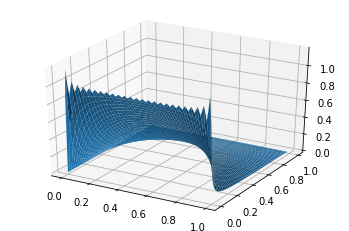

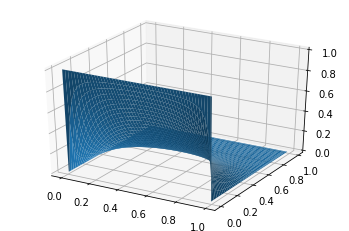

In [27]:
x = y = np.arange(0, 1.0, 0.01)
X, Y = np.meshgrid(x, y)

z_analytical= np.array(fun_analytical(np.ravel(X), np.ravel(Y)))
Z1 = z_analytical.reshape(X.shape)
show_3dplot(X, Y, Z1)

z_numerical= fun_numerical(100)
Z2 = z_numerical.reshape(X.shape)
show_3dplot(X, Y, Z2)

## 4.5 Truncation error

We made the reconciliation of both approaches to make sure our implementations and calculations are correct. We estimated the truncation error and presented the results below. To do so we chose the point in the very middle of the mesh for both analytical function and Jacobi discretization. Our goal is to show that the truncation error decreases along with the increasing number of the parts we subdivide the mesh into. We are aware that this method converges slowly but it is not significantly important in our example indeed. 

<font color="white" size=0.1>$\label{Consistency}\tag{4}$</font>
# 5 Proof of consistency

$$\textbf{The scheme is indeed consistent.}$$

**Proof**: <br>
Lets take exact and approximate solution and let $e_i = u_i-\hat{u}_i$. 

Exact solution:

$$ \frac{u_{n+1m} - 2u_{nm} + u_{n-1m}}{h^2_x} + \frac{u_{nm+1} - 2u_{nm} + u_{nm-1}}{h^2_y}  = O(h^2_x,h^2_y)$$

Assuming $h_x = h_y$

$$\frac{u_{n+1m} + u_{n-1m} + u_{nm+1} + u_{nm-1} - 4u_{nm}}{h^2_x} = O(2h^2_x)$$

Discrete solution:

$$\frac{\hat{u}_{n+1m} + \hat{u}_{n-1m} + \hat{u}_{nm+1} + \hat{u}_{nm-1} - 4u_{nm}}{h^2_x} = 0 $$

Subtracting both equations:

\begin{align}
    -\left\lbrace
    \begin{array}{r@{}l}
        \frac{u_{n+1m} + u_{n-1m} + u_{nm+1} + u_{nm-1} - 4u_{nm}}{h^2_x} &= O(2h^2_x),\\
        \\
        \frac{\hat{u}_{n+1m} + \hat{u}_{n-1m} + \hat{u}_{nm+1} + \hat{u}_{nm-1} - 4u_{nm}}{h^2_x} &= 0
    \end{array}
    \right.
\end{align}

\begin{align}
    \left\lbrace
    \begin{array}{r@{}l}
        \frac{e_{n+1m} + e_{n-1m} + e_{nm+1} + e_{nm-1} - 4e_{nm}}{h^2_x} &= O(2h^2_x),\\
        \\
        e_0=e_N=0
    \end{array}
    \right.
\end{align}

That lead to a solution for $e$:

$$Ae =O(\Delta x^2)$$

That means the scheme is consistent and order of convergence is 2 in space. **Q.E.D.**

We omit the proof of the stability of the method along with the premisses agreed with the lecturer Łukasz Płociniczak, PhD, D. Sc.
<font color="white" size=0.1>$\label{Conclusion}\tag{6}$</font>
# 6 Conclusion 

# Bibliography 
	
1. Partial Differential Equations, notes from the lectures led by Łukasz Płociniczak, PhD, D. Sc. <font color="white" size=0.1>$\label{plocin}\tag{[1]}$</font> 
2. [Wikipedia - Finite Difference Method](https://en.wikipedia.org/w/index.php?title=Finite_difference_method&action=edit&section=1) <font color="white" size=0.1>$\label{wiki}\tag{[2]}$</font> 
3. Kolditz O. (2002) Finite Difference Method. In: Computational Methods in Environmental Fluid Mechanics. Springer, Berlin, Heidelberg <font color="white" size=0.1>$\label{kolditz}\tag{[3]}$</font> 
4. [Peirce - Lecture 8](https://www.math.ubc.ca/~peirce/M257_316_2012_Lecture_8.pdf?fbclid=IwAR3XFO9YeBXsK7V0KDI6pA1e8fX6yH4ccbbIOQxcZLMqqfYhLhL6Uo8JhoU) <font color="white" size=0.1>$\label{peirce}\tag{[4]}$</font> 
	


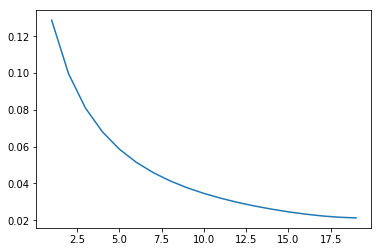

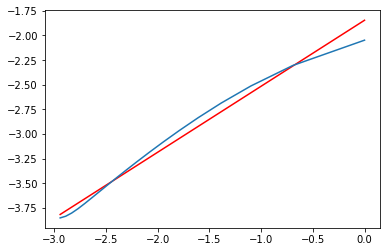

In [28]:
def error_plot():
    errors = []
    analytical_point = fun_analytical(0.5, 0.5)
    for n in range(7, 45, 2):
        u = fun_numerical(n)
        errors.append(abs(analytical_point - u[int((n + 1) / 2), int((n + 1) / 2)]))
    x, y = [n for n in range(1,len(errors)+1)], errors
    slope, intercept, r_value, p_value, std_err = sp.linregress(-np.log(x), np.log(y))
    x1 = np.linspace(min(-np.log(x)), max(-np.log(x)), len(np.log(x)))
    plt.figure()
    plt.plot(x, y)
    plt.figure()
    plt.plot(x1, intercept + slope * x1, 'r', label='fitted line')
    plt.plot(-np.log(x), np.log(y))
    plt.show()
    
error_plot()